# Project 1 Starter

**This is draft - version 0 - changes are possible and will be anounced.**

Project 1 is to allow students to practice Data Science concepts learned so far.

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode replace missing values
    - Replace features values that appear incorrect
- Encode categorical variables
- Split dataset to Train/Validation/Test
- Add engineered features
- Train and tune ML model
- Provide final metrics using Test dataset

### Types of models to train

Your final submission should include single model. 
The model set you should try to come up with best model:
1. Sklearn Logistic Regression - try all combinations of regularization
2. H2O-3 GLM - try different combinations of regularization



### Feature engineering

You should train/fit categorical features scalers and encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.
Your final model should have at least **10** new engineered features. On-hot-encoding, label encoding, and target encoding is not included in the **10** features.
You can try, but target encoding is not expected to produce improvement for Linear models.

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. GLM lecture and hands-on (Module-3)


**Note**: 
- You don't have to perform feature engineering using H2O-3 even if you decided to use H2O-3 GLM for model training.
- It is OK to perfor feature engineering using any technique, as long as you can replicate it correctly in the Scoring function.


### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.



### Scoring function

The Project-1 will be graded based on the completeness and performance of your final model against the hold-out dataset.
The hold-out dataset will not be known to the students. As part of your deliverables, you will need to submit a scoring function. The scoring function will perform the following:
- Accept dataset in the same format as provided with the project, minus "MIS_Status" column
- Load trained model and any encoders/scalers that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record
    - Record ID
    - Record label as determined by final model (0 or 1)
    - If your model returns probabilities, you need to assign the label based on maximum F1 threshold
    
Scoring function header:
```
def project_1_scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    l = data.shape[0]
    return l*[0]
```

Look for full example of scoring function at the bottom of the notebook. **Don't copy as is - this is just an example**



### Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format
    - Jupyter notebook in `html` format
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file



Your notebook should include explanations about your code and be designed to be easily followed and results replicated. Once you are done with the final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: To speed up progress, first produce working code using a small subset of the dataset.

## Dataset description

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied

**Don't use original dataset, use only dataset provided with project requirements in eLearning**

## Preparation

Use dataset provided in the eLearning

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [3]:
data = pd.read_csv('SBA_loans_project_1.zip')

In [4]:
print("Data shape:", data.shape)

Data shape: (809247, 21)


In [5]:
data_sub=data.iloc[0:50000]

In [6]:
print(data_sub.shape)

(50000, 21)


**Review dataset**

In [7]:
desc_df = describe_more(data)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,809247,int64,1,6,"{2047: 1, 115053: 1, 127339: 1, 129386: 1, 123..."
1,City,31320,object,1,30,"{'LOS ANGELES': 10372, 'HOUSTON': 9260, 'NEW Y..."
2,State,51,object,2,3,"{'CA': 117341, 'TX': 63425, 'NY': 51877, 'FL':..."
3,Zip,32731,int64,1,5,"{10001: 841, 90015: 830, 93401: 729, 90010: 65..."
4,Bank,5716,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78111, 'WELLS F..."
5,BankState,55,object,2,3,"{'CA': 106293, 'NC': 71557, 'IL': 59258, 'OH':..."
6,NAICS,1307,int64,1,6,"{0: 181845, 722110: 25217, 722211: 17476, 8111..."
7,Term,407,int64,1,3,"{84: 207228, 60: 80965, 240: 77385, 120: 69852..."
8,NoEmp,581,int64,1,4,"{1: 138836, 2: 124470, 3: 81466, 4: 66306, 5: ..."
9,NewExist,3,float64,3,3,"{1.0: 580478, 2.0: 227709, 0.0: 932}"


## Dataset preparation and clean-up

Modify and clean-up the dataset as following:
- Replace encode Na/Null values
- Convert the strings styled as '$XXXX.XX' to float values. Columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
- Convert MIS_Status to 0/1. Make value "CHGOFF" as 1

Any additional clean-up as you find fit.

In [8]:
# replace Na/Null values
values_to_fill = {}
for col in data.drop(columns=['MIS_Status']).columns:
    if data[col].dtype == 'object':
        values_to_fill[col] = "Missing"
    else:
        values_to_fill[col] = 0

data.fillna(value=values_to_fill,inplace=True)

In [9]:
desc_df = describe_more(data)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,809247,int64,1,6,"{2047: 1, 115053: 1, 127339: 1, 129386: 1, 123..."
1,City,31321,object,1,30,"{'LOS ANGELES': 10372, 'HOUSTON': 9260, 'NEW Y..."
2,State,52,object,2,7,"{'CA': 117341, 'TX': 63425, 'NY': 51877, 'FL':..."
3,Zip,32731,int64,1,5,"{10001: 841, 90015: 830, 93401: 729, 90010: 65..."
4,Bank,5717,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78111, 'WELLS F..."
5,BankState,56,object,2,7,"{'CA': 106293, 'NC': 71557, 'IL': 59258, 'OH':..."
6,NAICS,1307,int64,1,6,"{0: 181845, 722110: 25217, 722211: 17476, 8111..."
7,Term,407,int64,1,3,"{84: 207228, 60: 80965, 240: 77385, 120: 69852..."
8,NoEmp,581,int64,1,4,"{1: 138836, 2: 124470, 3: 81466, 4: 66306, 5: ..."
9,NewExist,3,float64,3,3,"{1.0: 580478, 2.0: 227709, 0.0: 1060}"


In [10]:
data.isna().sum()

index                   0
City                    0
State                   0
Zip                     0
Bank                    0
BankState               0
NAICS                   0
Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status           1822
dtype: int64

In [11]:
print(data.dtypes)

index                  int64
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross     object
BalanceGross          object
GrAppv                object
SBA_Appv              object
MIS_Status            object
dtype: object


In [12]:
#Converting the strings styled as '$XXXX.XX' to float values.
data['DisbursementGross'] = data['DisbursementGross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['BalanceGross'] = data['BalanceGross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['GrAppv'] = data['GrAppv'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['SBA_Appv'] = data['SBA_Appv'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [13]:
# print the data types of each column in the dataframe
print(data.dtypes)

index                  int64
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross    float64
BalanceGross         float64
GrAppv               float64
SBA_Appv             float64
MIS_Status            object
dtype: object


In [14]:
data.groupby(by=["MIS_Status"])["MIS_Status"].count()

MIS_Status
CHGOFF    141849
P I F     665576
Name: MIS_Status, dtype: int64

In [15]:
data["MIS_Status"].isna().sum()

1822

In [16]:
data['MIS_Status'] = data['MIS_Status'].replace({'CHGOFF': 1, 'P I F': 0}).astype(float)

In [17]:
data.groupby(by=["MIS_Status"])["MIS_Status"].count()

MIS_Status
0.0    665576
1.0    141849
Name: MIS_Status, dtype: int64

In [18]:
data["MIS_Status"].isna().sum()

1822

In [19]:
data.dropna(inplace=True)

In [20]:
data.isna().sum()

index                0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [21]:
data

,index,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,1.0,6,7,1,1,0,N,743000.0,0.0,743000.0,743000.0,0.0
1,1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,1.0,0,0,1,0,N,N,137000.0,0.0,137000.0,109737.0,0.0
2,2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,120,2,1.0,0,0,1,0,0,N,280000.0,0.0,280000.0,210000.0,0.0
3,3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,84,7,1.0,0,0,1,1,0,Y,144500.0,0.0,144500.0,122825.0,0.0
4,4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,60,2,2.0,0,0,1,0,N,Y,52500.0,0.0,52500.0,42000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809242,809242,BATON ROUGE,LA,70808,LOUISIANA CAP. CERT. DEVEL COM,LA,0,240,24,2.0,24,0,38605,0,N,N,749000.0,0.0,750000.0,750000.0,0.0
809243,809243,GREENVILLE,SC,29611,SUNTRUST BANK,GA,0,72,5,1.0,0,0,1,0,N,Y,75000.0,0.0,75000.0,67500.0,0.0
809244,809244,ST. PAUL,MN,55114,SUNRISE BANKS NATL ASSOC,MN,424990,120,31,1.0,0,31,1,1,0,N,216900.0,0.0,216900.0,162675.0,0.0
809245,809245,TUSCALOOSA,AL,35401,BK OF TUSCALOOSA A DIVISION O,AL,0,120,4,2.0,0,0,1,1,N,N,75000.0,0.0,75000.0,60000.0,0.0


## Categorical and numerical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value
- Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- WOE encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_woe


WOE encoder can be used with numerical variables too. 


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

In [22]:
import numpy as np

#Adding Engineered Features
    
#1. Creating a feature that is indicating whether the borrower is located in an urban or rural area
data['Is_urban'] = (data['UrbanRural'] == 1).astype(int)
    
#2. Creating a feature that is indicating the ratio of retained jobs to created jobs
data['Retained_Created_Job_Ratio'] = data['RetainedJob'] /(data['CreateJob'] + 1)
    
#3. Creating a feature that is indicating whether the borrower has a low documentation loan
data['Is_low_doc'] = (data['LowDoc'] == 'Y').astype(int)
    
#4. Creating a feature that is indicating whether the borrower has a revolving line of credit
data['Is_rev_line'] = (data['RevLineCr'] == 'Y').astype(int)
    
#5. Creating a feature that is indicating the ratio of the loan amount to the gross disbursement
data['Loan_Gross_Ratio'] = data['GrAppv'] / data['DisbursementGross']
    
#6. Creating a feature that is indicating the ratio of the SBA loan amount to the gross disbursement
data['SBA_Loan_Gross_Ratio'] = data['SBA_Appv'] / data['DisbursementGross']
    
#7. Creating a binary variable feature that is indicating whether the loan was for a franchise
data['Is_franchise'] = (data['FranchiseCode'] != 0).astype(int)    
    
#8. Creating a feature that is log transformation of Disbursement Gross
data['LogDisbursementGross'] = np.log(data['DisbursementGross'] + 1)
    
#9. Creating a feature that is Log Transformation of SBA Approval Amount
data['LogSBAApprovalAmount'] = np.log(data['SBA_Appv'] + 1)

#10. Creating a feature that is indicating the bank originated Loan
data['BankOriginatedLoan'] = np.where(data['Bank'] == data['BankState'], 1, 0)

#11. Creating a feature that is indicating loan amount to income ratio or disbursement amount per employees
data['LoanToIncomeRatio'] = data['DisbursementGross'] / (data['NoEmp'] + 1)

#12. Creating a feature that is indicating loan amount to number of business owners Ratio
data['LoanToOwnerRatio'] = data['DisbursementGross'] / (data['NewExist'] + 1)


## Added engineered features explanation

1. Is_urban: This feature indicates whether the borrower is located in an urban or rural area. A binary feature with value 1 for urban and 0 for rural.
2. Retained_Created_Job_Ratio: This feature represents the ratio of retained jobs to created jobs. This can be an important indicator of the borrower's ability to sustain their business in the long run.
3. Is_low_doc: This feature indicates whether the borrower has a low documentation loan. A binary feature with value 1 for low doc loans and 0 for other loans.
4. Is_rev_line: This feature indicates whether the borrower has a revolving line of credit. A binary feature with value 1 for having a revolving line of credit and 0 for not having it.
5. Loan_Gross_Ratio: This feature represents the ratio of the loan amount to the gross disbursement. It can give an indication of the financial risk associated with the loan.
6. SBA_Loan_Gross_Ratio: This feature represents the ratio of the SBA loan amount to the gross disbursement. It can give an indication of the SBA's involvement in the loan.
7. Is_franchise: This feature indicates whether the loan was for a franchise. A binary feature with value 1 for franchise loans and 0 for other loans.
8. LogDisbursementGross: This feature is a logarithmic transformation of the Disbursement Gross amount. This can help in handling the wide range of values and outliers in this feature.
9. LogSBAApprovalAmount: This feature is a logarithmic transformation of the SBA Approval Amount. This can help in handling the wide range of values and outliers in this feature.
10. BankOriginatedLoan: This feature indicates whether the loan was originated by the same bank as the borrower's bank state. A binary feature with value 1 for bank originated loans and 0 for other loans.
11. LoanToIncomeRatio: This feature represents the loan amount to income ratio or disbursement amount per employees. It can give an indication of the borrower's ability to repay the loan.
12. LoanToOwnerRatio: This feature represents the loan amount to number of business owners ratio. It can give an indication of the borrower's ownership structure and their ability to manage the business.




In [23]:
np.isfinite(data['LoanToOwnerRatio'])

0         True
1         True
2         True
3         True
4         True
          ... 
809242    True
809243    True
809244    True
809245    True
809246    True
Name: LoanToOwnerRatio, Length: 807425, dtype: bool

In [24]:
print(data.dtypes)

index                           int64
City                           object
State                          object
Zip                             int64
Bank                           object
BankState                      object
NAICS                           int64
Term                            int64
NoEmp                           int64
NewExist                      float64
CreateJob                       int64
RetainedJob                     int64
FranchiseCode                   int64
UrbanRural                      int64
RevLineCr                      object
LowDoc                         object
DisbursementGross             float64
BalanceGross                  float64
GrAppv                        float64
SBA_Appv                      float64
MIS_Status                    float64
Is_urban                        int32
Retained_Created_Job_Ratio    float64
Is_low_doc                      int32
Is_rev_line                     int32
Loan_Gross_Ratio              float64
SBA_Loan_Gro

In [25]:
#Encoding of the categorical variables

from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from copy import deepcopy
import pickle

#Categorical encoders dictionary
cat_encoders = {}
#New categorical (encoded) columns
cat_enc_columns = []

for col in data.columns:
    if data[col].dtype == 'object':
        if data[col].nunique() < 10:
            print("One-hot encoding of ", col)
            enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
            enc.fit(data[[col]])
            result = enc.transform(data[[col]])
            ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
            cat_enc_columns = cat_enc_columns + ohe_columns
            result_df = pd.DataFrame(result, columns=ohe_columns, index=data.index)
            data = pd.concat([data, result_df.reindex(data.index)], axis=1, join='inner')
            cat_encoders[col] = [deepcopy(enc), "ohe"]
        else:
            print("Target encoding of ", col)
            enc = TargetEncoder()
            enc.fit(data[col], y=data['MIS_Status'], handle_unknown='value')
            pickle.dump(enc, open(col+'_trg_'+'pre_processing.p', "wb"))
            new_col_name = col+"_trg"
            data[new_col_name] = enc.transform(data[[col]])
            cat_encoders[col] = [deepcopy(enc), "trg"]
            cat_enc_columns.append(new_col_name)



Target encoding of  City
Target encoding of  State
Target encoding of  Bank
Target encoding of  BankState
Target encoding of  RevLineCr
One-hot encoding of  LowDoc


In [26]:
data.shape

(807425, 47)

In [27]:
data

,index,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,Is_urban,Retained_Created_Job_Ratio,Is_low_doc,Is_rev_line,Loan_Gross_Ratio,SBA_Loan_Gross_Ratio,Is_franchise,LogDisbursementGross,LogSBAApprovalAmount,BankOriginatedLoan,LoanToIncomeRatio,LoanToOwnerRatio,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y
0,0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,1.0,6,7,1,1,0,N,743000.0,0.0,743000.0,743000.0,0.0,1,1.0,0,0,1.000000,1.000000,1,13.518453,13.518453,0,92875.000000,371500.000000,0.172222,0.197715,0.000000e+00,0.382930,0.14969,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,1.0,0,0,1,0,N,N,137000.0,0.0,137000.0,109737.0,0.0,0,0.0,0,0,1.000000,0.801000,1,11.827744,11.605851,0,6523.809524,68500.000000,0.118343,0.123313,2.740116e-01,0.222357,0.14672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,120,2,1.0,0,0,1,0,0,N,280000.0,0.0,280000.0,210000.0,0.0,0,0.0,0,0,1.000000,0.750000,1,12.542548,12.254868,0,93333.333333,140000.000000,0.150062,0.184801,2.681605e-01,0.180539,0.14969,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,84,7,1.0,0,0,1,1,0,Y,144500.0,0.0,144500.0,122825.0,0.0,1,0.0,1,0,1.000000,0.850000,1,11.881042,11.718524,0,18062.500000,72250.000000,0.141538,0.128998,3.757235e-02,0.065823,0.14969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,60,2,2.0,0,0,1,0,N,Y,52500.0,0.0,52500.0,42000.0,0.0,0,0.0,1,0,1.000000,0.800000,1,10.868587,10.645449,0,17500.000000,17500.000000,0.178832,0.153759,1.751398e-01,0.158554,0.14672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809242,809242,BATON ROUGE,LA,70808,LOUISIANA CAP. CERT. DEVEL COM,LA,0,240,24,2.0,24,0,38605,0,N,N,749000.0,0.0,750000.0,750000.0,0.0,0,0.0,0,0,1.001335,1.001335,1,13.526496,13.527830,0,29960.000000,249666.666667,0.236495,0.179884,1.093464e-11,0.108067,0.14672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
809243,809243,GREENVILLE,SC,29611,SUNTRUST BANK,GA,0,72,5,1.0,0,0,1,0,N,Y,75000.0,0.0,75000.0,67500.0,0.0,0,0.0,1,0,1.000000,0.900000,1,11.225257,11.119898,0,12500.000000,37500.000000,0.165650,0.206869,1.181720e-01,0.097265,0.14672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
809244,809244,ST. PAUL,MN,55114,SUNRISE BANKS NATL ASSOC,MN,424990,120,31,1.0,0,31,1,1,0,N,216900.0,0.0,216900.0,162675.0,0.0,1,31.0,0,0,1.000000,0.750000,1,12.287196,11.999516,0,6778.125000,108450.000000,0.090759,0.117211,1.363636e-01,0.076790,0.14969,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
809245,809245,TUSCALOOSA,AL,35401,BK OF TUSCALOOSA A DIVISION O,AL,0,120,4,2.0,0,0,1,1,N,N,75000.0,0.0,75000.0,60000.0,0.0,1,0.0,0,0,1.000000,0.800000,1,11.225257,11.002117,0,15000.000000,25000.000000,0.146554,0.166314,1.447223e-01,0.130527,0.14672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
col20 = data.pop(data.columns[20])
data.insert(1, col20.name, col20)


In [29]:
data.columns[:33]

Index(['index', 'MIS_Status', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'Is_urban',
       'Retained_Created_Job_Ratio', 'Is_low_doc', 'Is_rev_line',
       'Loan_Gross_Ratio', 'SBA_Loan_Gross_Ratio', 'Is_franchise',
       'LogDisbursementGross', 'LogSBAApprovalAmount', 'BankOriginatedLoan',
       'LoanToIncomeRatio', 'LoanToOwnerRatio'],
      dtype='object')

In [30]:
print(data.dtypes)

index                           int64
MIS_Status                    float64
City                           object
State                          object
Zip                             int64
Bank                           object
BankState                      object
NAICS                           int64
Term                            int64
NoEmp                           int64
NewExist                      float64
CreateJob                       int64
RetainedJob                     int64
FranchiseCode                   int64
UrbanRural                      int64
RevLineCr                      object
LowDoc                         object
DisbursementGross             float64
BalanceGross                  float64
GrAppv                        float64
SBA_Appv                      float64
Is_urban                        int32
Retained_Created_Job_Ratio    float64
Is_low_doc                      int32
Is_rev_line                     int32
Loan_Gross_Ratio              float64
SBA_Loan_Gro

In [31]:
'''from sklearn.preprocessing import MinMaxScaler
num_scalers = {}

for col in data.columns[1:32]:
    if data[col].dtype != 'object':
        print("MinMax scale of ", col)
        scaler = MinMaxScaler()
        scaler.fit(data[[col]])
        pickle.dump(scaler, open(col+'_sc_'+'pre_processing.p', "wb"))
        data[col+"_sc"] = scaler.transform(data[[col]])
        
        num_scalers[col] = [deepcopy(scaler),"MinMax"]
        
    '''
#Getting better accuracy with standard scaler

'from sklearn.preprocessing import MinMaxScaler\nnum_scalers = {}\n\nfor col in data.columns[1:32]:\n    if data[col].dtype != \'object\':\n        print("MinMax scale of ", col)\n        scaler = MinMaxScaler()\n        scaler.fit(data[[col]])\n        pickle.dump(scaler, open(col+\'_sc_\'+\'pre_processing.p\', "wb"))\n        data[col+"_sc"] = scaler.transform(data[[col]])\n        \n        num_scalers[col] = [deepcopy(scaler),"MinMax"]\n        \n    '

In [32]:
from sklearn.preprocessing import StandardScaler
num_scalers = {}

'''Scaling only original and feature engineered columns'''
for col in data.columns[2:33]:
    if data[col].dtype != 'object':
        print("Standard scale of ", col)
        scaler = StandardScaler()
        scaler.fit(data[[col]])
        pickle.dump(scaler, open(col+'_sc_'+'pre_processing.p', "wb"))
        data[col+"_sc"] = scaler.transform(data[[col]])
        
        num_scalers[col] = [deepcopy(scaler),"Standard"]


Standard scale of  Zip
Standard scale of  NAICS
Standard scale of  Term
Standard scale of  NoEmp
Standard scale of  NewExist
Standard scale of  CreateJob
Standard scale of  RetainedJob
Standard scale of  FranchiseCode
Standard scale of  UrbanRural
Standard scale of  DisbursementGross
Standard scale of  BalanceGross
Standard scale of  GrAppv
Standard scale of  SBA_Appv
Standard scale of  Is_urban
Standard scale of  Retained_Created_Job_Ratio
Standard scale of  Is_low_doc
Standard scale of  Is_rev_line
Standard scale of  Loan_Gross_Ratio
Standard scale of  SBA_Loan_Gross_Ratio
Standard scale of  Is_franchise
Standard scale of  LogDisbursementGross
Standard scale of  LogSBAApprovalAmount
Standard scale of  BankOriginatedLoan
Standard scale of  LoanToIncomeRatio
Standard scale of  LoanToOwnerRatio


## Logistic Regression from sklearn

# Model Training

See Project summary for types of models

In [33]:
from sklearn.model_selection import train_test_split

#Splitting the dataset into train (60%), validation (20%), and test (20%) sets
train_val, test = train_test_split(data, test_size=0.2, random_state=182)
train, val = train_test_split(train_val, test_size=0.25, random_state=182)

#Checking the size of each set
print(f"Train set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")

Train set size: 484455
Validation set size: 161485
Test set size: 161485


In [34]:
train.shape

(484455, 72)

In [35]:
X_train = train.drop(columns='MIS_Status')
y_train = train['MIS_Status']
X_valid = val.drop(columns='MIS_Status')
y_valid = val['MIS_Status']
X_test = test.drop(columns='MIS_Status')
y_test = test['MIS_Status']
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((484455, 71), (484455,), (161485, 71), (161485,), (161485, 71), (161485,))

In [36]:
X_trn = X_train.iloc[:,33:]
X_vld = X_valid.iloc[:,33:]
X_tst = X_test.iloc[:,33:]

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score



In [38]:
%%time
logreg = LogisticRegression(C=0.1 , max_iter=100,
                            penalty= 'l1',
                            solver= 'liblinear')
logreg.fit(X_trn, y_train)
# print logreg accuracy score, confusion matrix and auc score
print("Logistic Regression Accuracy Score: ", logreg.score(X_trn, y_train))
print("Logistic Regression Accuracy Score: ", logreg.score(X_vld, y_valid))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_train, logreg.predict(X_trn))/X_trn.shape[0])
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_valid, logreg.predict(X_vld))/X_vld.shape[0])
print("Logistic Regression AUC Score: ", roc_auc_score(y_train, logreg.predict_proba(X_trn)[:,1]))
print("Logistic Regression AUC Score: ", roc_auc_score(y_valid, logreg.predict_proba(X_vld)[:,1]))

Logistic Regression Accuracy Score:  0.8749852927516487
Logistic Regression Accuracy Score:  0.8757841285568319
Logistic Regression Confusion Matrix: 
 [[0.80198986 0.02216924]
 [0.10284547 0.07299543]]
Logistic Regression Confusion Matrix: 
 [[0.80289191 0.02207635]
 [0.10213952 0.07289222]]
Logistic Regression AUC Score:  0.8660627716020493
Logistic Regression AUC Score:  0.867694669072993
CPU times: total: 3min 15s
Wall time: 3min 17s


In [39]:
print("Logistic Regression F1 Score: ", f1_score(y_train, logreg.predict(X_trn),average='macro'))
print("Logistic Regression F1 Score: ", f1_score(y_valid, logreg.predict(X_vld),average='macro'))

Logistic Regression F1 Score:  0.7331978613536078
Logistic Regression F1 Score:  0.7340703249228822


## H2O GLM model work

In [40]:
import h2o
try:
    h2o.init()
    h2o.cluster().shutdown()
except:
    pass 

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.2+7-44, mixed mode, sharing)
  Starting server from C:\Users\User\ml-spring-2023\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\User\AppData\Local\Temp\tmpcwddxng2
  JVM stdout: C:\Users\User\AppData\Local\Temp\tmpcwddxng2\h2o_User_started_from_python.out
  JVM stderr: C:\Users\User\AppData\Local\Temp\tmpcwddxng2\h2o_User_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,2 months and 28 days
H2O_cluster_name:,H2O_from_python_User_qiaom8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.963 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


H2O session _sid_9f55 closed.


In [41]:
#Limit to 8 threads and 16GB memory
h2o.init(nthreads=8, max_mem_size=16)


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.2+7-44, mixed mode, sharing)
  Starting server from C:\Users\User\ml-spring-2023\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\User\AppData\Local\Temp\tmpyi311tbp
  JVM stdout: C:\Users\User\AppData\Local\Temp\tmpyi311tbp\h2o_User_started_from_python.out
  JVM stderr: C:\Users\User\AppData\Local\Temp\tmpyi311tbp\h2o_User_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,2 months and 28 days
H2O_cluster_name:,H2O_from_python_User_uq1ili
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [42]:
df_h = h2o.import_file('SBA_loans_project_1.zip')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [43]:
df_h.describe()

Rows:809247
Cols:21

,index,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
type,int,enum,enum,int,enum,enum,int,int,int,int,int,int,int,int,enum,enum,enum,int,enum,enum,enum
mins,0.0,,,0.0,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,0.0,,,
mean,404623.0,,,53800.93700440042,,,398573.7836099485,110.7987758990764,11.414083709917985,1.2802764488289102,8.415865613341785,10.773365857395845,2751.9391755545557,0.7577476345293832,,,,0.0007414400743417248,,,
maxs,809246.0,,,99999.0,,,928120.0,569.0,9999.0,2.0,8800.0,9500.0,99999.0,2.0,,,,600.0,,,
sigma,233609.63098297123,,,31186.36710873627,,,263354.97981331364,78.87242769568354,74.5294288513172,0.4516918788946227,236.28834837455463,236.61205316253321,12758.411810115618,0.6463471493041516,,,,0.666981292545027,,,
zeros,1,,,262,,,181845,720,5937,932,566148,396287,187961,290804,,,,809235,,,
missing,0,25,12,0,1405,1411,0,0,0,128,0,0,0,0,4094,3662,0,11,0,0,1822
0,0.0,GLEN BURNIE,MD,21060.0,"BUSINESS FINANCE GROUP, INC.",VA,811111.0,240.0,7.0,1.0,6.0,7.0,1.0,1.0,0,N,"$743,000.00",0.0,"$743,000.00","$743,000.00",P I F
1,1.0,WEST BEND,WI,53095.0,JPMORGAN CHASE BANK NATL ASSOC,IL,722410.0,240.0,20.0,1.0,0.0,0.0,1.0,0.0,N,N,"$137,000.00",0.0,"$137,000.00","$109,737.00",P I F
2,2.0,SAN DIEGO,CA,92128.0,UMPQUA BANK,OR,0.0,120.0,2.0,1.0,0.0,0.0,1.0,0.0,0,N,"$280,000.00",0.0,"$280,000.00","$210,000.00",P I F


In [44]:
# Choose which columns to encode
cat_columns = ["City","State","Bank","BankState", "NewExist", "RevLineCr","LowDoc","Zip"]
encoded_columns = cat_columns
response = "MIS_Status"

df_h[encoded_columns+[response]] = df_h[encoded_columns+[response]].asfactor()

In [45]:
train1,valid1,test1 = df_h.split_frame(ratios=[.60, .20], seed=182)

In [46]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

predictors = train1.columns
predictors.remove("MIS_Status")
print("Predictor columns:", predictors)    
response_col = "MIS_Status"

glm = H2OGeneralizedLinearEstimator(nfolds=0,seed=182)

glm.train(predictors, response_col, training_frame= train1)
model_summary = glm.summary()

Predictor columns: ['index', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [47]:
model_summary

,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 0.02373 )",237107,3,4,py_3_sid_9722


In [48]:
print("Best accuracy threshold:",glm.model_performance(valid1).accuracy()[0][0],"\n",
      " Accuracy:",
      glm.model_performance(valid1).accuracy()[0][1])
print("Best F1 threshold:",glm.model_performance(valid1).F1()[0][0],"\n",
      " F1:",
      glm.model_performance(valid1).F1()[0][1])
print("Model AUC:", glm.model_performance(valid1).auc())
print("Model AUCPR:", glm.model_performance(valid1).aucpr())
glm.model_performance(valid1).confusion_matrix()

Best accuracy threshold: 0.6783886513962886 
  Accuracy: 0.8398780306410828
Best F1 threshold: 0.6783886513962886 
  F1: 0.9077996973763096
Model AUC: 0.8142315451095459
Model AUCPR: 0.9451594243896607


,CHGOFF,P I F,Error,Rate
CHGOFF,8326.0,20205.0,0.7082,(20205.0/28531.0)
P I F,5631.0,127190.0,0.0424,(5631.0/132821.0)
Total,13957.0,147395.0,0.1601,(25836.0/161352.0)


In [49]:
# shutdown h2o
h2o.shutdown()

H2O session _sid_9722 closed.


C:\Users\User\AppData\Local\Temp\ipykernel_14004\1904663363.py:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


## Model Tuning

Choose one model from the above list. You should provide reasoning on why you have picked the model over others. Perform tuning for the selected model:
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 50 combinations.
- To avoid overfitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. See project description

**Selelct final model that produces best performance on the Test dataset.**
- For the best model, calculate probability threshold to maximize F1. 

## Selecting Logistic Regression model from sklearn

Model selection is based on the accuracy, model AUC and F1 score which is coming out better for the logistic regression from sklearn compared to the GLM model from H2O.

H2O GLM Model Validation Set details:-
Accuracy: 0.8398780306410828
F1: 0.9077996973763096
Model AUC: 0.8142315451095459

Sklearn Logistic Regression Validation Set details:-
Logistic Regression Accuracy Score:  0.8753011115583491
Logistic Regression F1 Score:  0.7323520369801343
Logistic Regression AUC Score:  0.8667909805414914

Hyperparameter tuning being done for the logistic regression model

In [50]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 100)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 100)
    log_l1.fit(X_trn, y_train)
    log_l2.fit(X_trn, y_train)
    train_score_l1.append(log_l1.score(X_trn, y_train))
    train_score_l2.append(log_l2.score(X_trn, y_train))
    test_score_l1.append(log_l1.score(X_vld, y_valid))
    test_score_l2.append(log_l2.score(X_vld, y_valid))

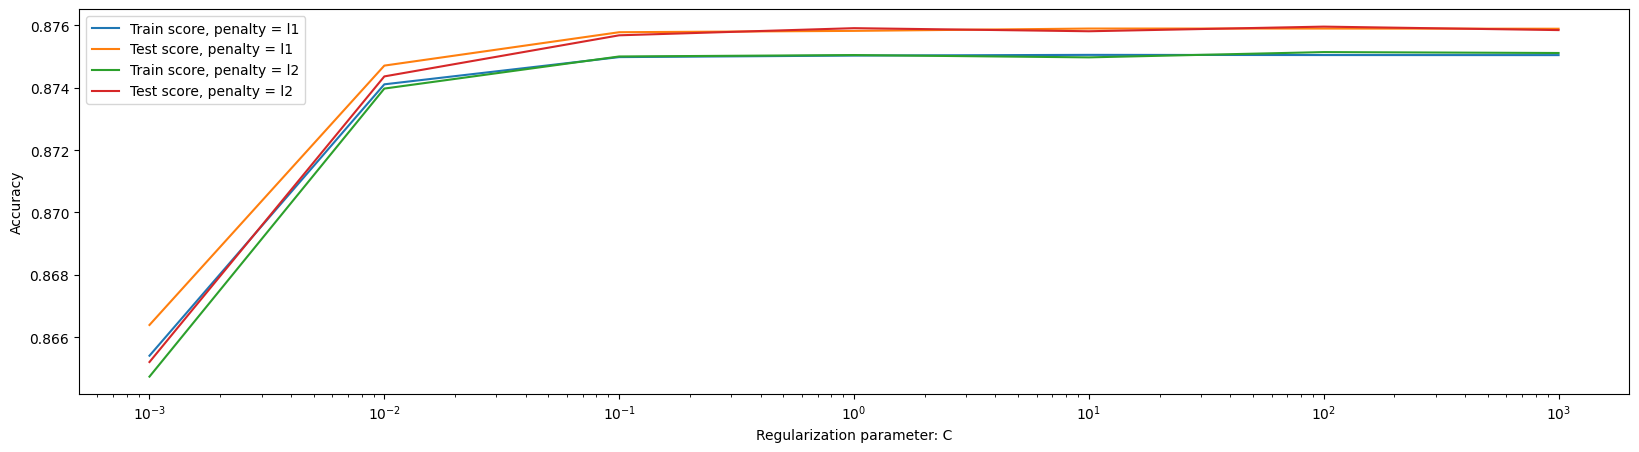

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [53]:
#Best model parameters
logreg = LogisticRegression(C=0.1 , max_iter=100,
                            penalty= 'l1',
                            solver= 'liblinear')
logreg.fit(X_trn, y_train)
# print logreg accuracy score, confusion matrix, auc score and F1 score
print("Logistic Regression Accuracy Score: ", logreg.score(X_vld, y_valid))
print("Logistic Regression Accuracy Score for test data set: ", logreg.score(X_tst, y_test))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_valid, logreg.predict(X_vld))/X_vld.shape[0])
print("Logistic Regression Confusion Matrix for test data set: \n", confusion_matrix(y_test, logreg.predict(X_tst))/X_tst.shape[0])
print("Logistic Regression AUC Score: ", roc_auc_score(y_valid, logreg.predict_proba(X_vld)[:,1]))
#print("Logistic Regression AUC Score for test data set: ", roc_auc_score(y_test logreg.predict_proba(X_tst)[:,1]))
print("Logistic Regression F1 Score: ", f1_score(y_valid, logreg.predict(X_vld),average='macro'))
print("Logistic Regression F1 Score for test data set: ", f1_score(y_test, logreg.predict(X_tst),average='macro'))

Logistic Regression Accuracy Score:  0.8757841285568319
Logistic Regression Accuracy Score for test data set:  0.8747561693036505
Logistic Regression Confusion Matrix: 
 [[0.8028981  0.02207016]
 [0.10214571 0.07288603]]
Logistic Regression Confusion Matrix for test data set: 
 [[0.8022355  0.02191535]
 [0.10332848 0.07252067]]
Logistic Regression AUC Score:  0.8676936875204707
Logistic Regression F1 Score:  0.7340600298958461
Logistic Regression F1 Score for test data set:  0.7321080757834264


In [54]:
import pickle
# making the artifacts dictionary with model and threshold
artifacts_dict = {
    "model": logreg,
    "threshold": 0.60

}
# writing the pickle file with wb parameters
artifacts_dict_file = open("./artifacts/artifacts_dict_file.pkl", "wb")
# dumping the object in the file
pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)
# finally closing the file
artifacts_dict_file.close() 

## Save all artifacts

Save all artifacts needed for scoring function:
- Trained model
- Encoders
- Any other arficats you will need for scoring

**You should stop your notebook here. Scoring function should be in a separate file/notebook.**

## Stop Here. Create new file/notebook

## ==============================================